### Butler Volmer Explicit Equations error
This brief study will show which explicit model for BV equation for Vactivation calculation is the closest to the actual BV. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [2]:
import IV_model

In [3]:
IV_model.IV_new_2

<function IV_model.IV_new_2(oT, fT, J, pO2air, pN2air, pH2, pH2O, pCO, pCO2, pCH4, pN2, pSys, BV_alpha, BV_prexp, BV_Eact, V_loss=0.0, R_cont=0.0, DsurfH2th1=0.1, DsurfH2th2=4.51e-05, Fkn=True, d0_am=0.28, d0_cm=0.28, th_e=10)>

# Environmental parameter

In [4]:
#enviornment parameter

oT =700+273.15      #Temperature oxidant (K)
fT =700+273.15      #Temperature fuel (K)


# environment parameters
R=8.314
F=96485.0

pO2air=0.3          #Air side partial pressure O2 (atm)
pN2air =0.7         #Air side partial pressure N2 (atm)
# pH2 = 0.4375        #Fuel side partial pressure H2 (atm)
# pH2O =0.3125        #Fuel side partial pressure H2O (atm)
# pCO=0.0625          #Fuel side partial pressure CO (atm)
# pCO2=0.0625         #Fuel side partial pressure CO2 (atm)
# pCH4=0.125          #Fuel side partial pressure CH4 (atm)
# pN2=0.0             #Fuel side partial pressure N2 (atm)
pH2 = 0.97        #Fuel side partial pressure H2 (atm)
pH2O =0.03        #Fuel side partial pressure H2O (atm)
pCO=0.0         #Fuel side partial pressure CO (atm)
pCO2=0.0         #Fuel side partial pressure CO2 (atm)
pCH4=0.0          #Fuel side partial pressure CH4 (atm)
pN2=0.0             #Fuel side partial pressure N2 (atm)
pSys=1.0            #System pressure (atm)  

# adjustable parameters for B-V loss (starting with these for optimization)
BV_alpha = 0.43236 #0.43236/3 **
BV_prexp = 5639 #**
BV_Eact = 79.616 #**


J=0.1

# Optimized/ Fitted Parameters
### First letter = experiment name, # = type of BV function

In [5]:
# Model Parameters. Defined by optimization functions
# BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, d0_am=0.28,d0_cm=0.28, 

J3 = (1.68334655e-01,  5.63899994e+03,  7.96160000e+04, -4.40787208e-02,
        2.19644090e-01,  2.00000000e-01,  2.79458248e-01)

B3 = [2.69218132e-01,  5.63900045e+03,  7.96160002e+04, -5.97469329e-02,
        0.00000000e+00,  2.00000000e+00,  3.62167047e-01]

J3_5 = [7.00000000e-01,  1.00000846e+00,  2.00000485e+02, -2.60802600e-02,
        5.32689266e-01,  2.00000000e-01,  2.79295936e-01]

B3_5 = [7.00000000e-01,  1.00000846e+00,  2.00000485e+02, -2.60802600e-02,
        5.32689266e-01,  2.00000000e-01,  2.79295936e-01]

J4 = [6.00000000e-01,  5.63899995e+03,  7.96160000e+04, -8.11476134e-02,
        3.99214619e-01,  2.00000000e-01,  2.27425977e-01]

B4 = [6.00000000e-01,  4.99999988e+03,  7.00000001e+04, -1.96831760e-01,
        3.56237271e-02,  2.00000000e-01,  2.29666245e-01]

J5 = [6.00000000e-01,  5.63899995e+03,  7.96160000e+04, -8.24174358e-02,
        4.05113768e-01,  2.32356931e-01,  2.79653913e-01]
B5 = [3.72932228e-01,  5.63899993e+03,  7.96160001e+04, -1.36362672e-01,
        8.76092882e-03,  2.00000000e-01,  2.29482770e-01]
     

# User Defined Temperature (operational T)

In [157]:
#user defined
Toper=800
Tk = Toper+273.15

# Experimental Data Extraction From JM and BP 

In [158]:
#Current Density JM
filename_JM = './ExperimentalData/JM2017/'+str(Toper)+'.csv'
data_JM = np.loadtxt(open(filename_JM, "rb"), delimiter=",", skiprows=1)
J_JM = data_JM[:,0]
#ToperJM = data_JM[:,2]
y_JM = data_JM[:,1]



In [159]:
filename_BP = './ExperimentalData/BP2020/AllData_BP.csv'
data_BP = np.loadtxt(open(filename_BP, "rb"), delimiter=",", skiprows=1)
J_BP = data_BP[34:75,0]
ToperBP = data_BP[34:75,2]
y_BP = data_BP[34:75,1]
#    plt.plot(data[:,0], data[:,1], colorlist[i]+markerlist[i], label = 'EXP '+str(Tlist[i]))
#For BP: [0:12]: T=600, [12:34]: T=700, [34:74]: T=800

# For JM Experimental values

In [85]:
BV_3J = np.zeros(len(J_JM))
BV_3_5J = np.zeros(len(J_JM))
BV_4J = np.zeros(len(J_JM))
BV_5J = np.zeros(len(J_JM))

In [86]:
for i in range(len(BV_3J)):
    V_JM= IV_model.IV_new_3(Toper+273.15,Toper+273.15,J_JM[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    J3[0], J3[1], J3[2],
                    J3[3], J3[4], 0.1, 4.51e-5,
                    True,J3[5],J3[6])
    BV_3J[i]=V_JM[3]

In [87]:
for i in range(len(BV_3_5J)):
    V_JM= IV_model.IV_new_3_5(Toper+273.15,Toper+273.15,J_JM[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    J3_5[0], J3_5[1], J3_5[2],
                    J3_5[3], J3_5[4], 0.1, 4.51e-5,
                    True,J3_5[5],J3_5[6])
    BV_3_5J[i]=V_JM[3]

In [88]:
for i in range(len(BV_4J)):
    V_JM= IV_model.IV_new_4(Toper+273.15,Toper+273.15,J_JM[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    J4[0], J4[1], J4[2],
                    J4[3], J4[4], 0.1, 4.51e-5,
                    True,J4[5],J4[6])
    BV_4J[i]=V_JM[3]

In [89]:
for i in range(len(BV_5J)):
    V_JM= IV_model.IV_new_5(Toper+273.15,Toper+273.15,J_JM[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    J5[0], J5[1], J5[2],
                    J5[3], J5[4], 0.1, 4.51e-5,
                    True,J5[5],J5[6])
    BV_5J[i]=V_JM[3]

In [104]:
# Original ButlerVolmer Equation 

Vact = np.linspace(0,0.25,20)
J=np.zeros(len(Vact))
BV_prexp=5639/Tk/R/10
BV_Eact=79616/Tk/R/10
BV_alpha=0.45
i0=BV_prexp*math.exp(-BV_Eact)

for i in range(len(J)):
    J[i]=-i0*(math.exp(-BV_alpha*2*Vact[i]*F/R/Tk)-math.exp((1-BV_alpha)*Vact[i]*2*F/R/Tk))


Text(0, 0.5, 'Voltage, V')

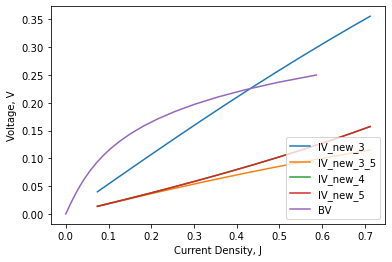

In [105]:
fig = plt.figure()

plt.plot(J_JM, BV_3J, label='IV_new_3')
plt.plot(J_JM, BV_3_5J, label='IV_new_3_5')
plt.plot(J_JM, BV_4J, label='IV_new_4')
plt.plot(J_JM, BV_5J, label='IV_new_5')
#plt.plot(J_JM, y_JM, label='actual')
plt.plot(J, Vact, label= 'BV')
plt.legend(loc='lower right')
plt.xlabel("Current Density, J")
plt.ylabel("Voltage, V")


# For BP Experimental Values

In [160]:
BV_3B = np.zeros(len(J_BP))
BV_3_5B = np.zeros(len(J_BP))
BV_4B = np.zeros(len(J_BP))
BV_5B = np.zeros(len(J_BP))

In [161]:
for i in range(len(BV_3B)):
    V_BP= IV_model.IV_new_3(ToperBP[i]+273.15,ToperBP[i]+273.15,J_BP[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    B3[0], B3[1], B3[2],
                    B3[3], B3[4], 0.1, 4.51e-5,
                    True,B3[5],B3[6])
    BV_3B[i]=V_BP[3]

In [162]:
for i in range(len(BV_3_5B)):
    V_BP= IV_model.IV_new_3_5(ToperBP[i]+273.15,ToperBP[i]+273.15,J_BP[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    B3_5[0], B3_5[1], B3_5[2],
                    B3_5[3], B3_5[4], 0.1, 4.51e-5,
                    True,B3_5[5],B3_5[6])
    BV_3_5B[i]=V_BP[3]

In [163]:
for i in range(len(BV_4B)):
    V_BP= IV_model.IV_new_4(ToperBP[i]+273.15,ToperBP[i]+273.15,J_BP[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    B4[0], B4[1], B4[2],
                    B4[3], B4[4], 0.1, 4.51e-5,
                    True, B4[5], B4[6])
    BV_4B[i]=V_BP[3]

In [164]:
for i in range(len(BV_5B)):
    V_BP= IV_model.IV_new_5(ToperBP[i]+273.15,ToperBP[i]+273.15,J_BP[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    B5[0], B5[1], B5[2],
                    B5[3], B5[4], 0.1, 4.51e-5,
                    True,B5[5],B5[6])
    BV_5B[i]=V_BP[3]

In [175]:
Vact = np.linspace(0,0.45,20)
J=np.zeros(len(Vact))
BV_prexp=5639/Tk/R/10
BV_Eact=79616/Tk/R/10
BV_alpha=0.5
i0=BV_prexp*math.exp(-BV_Eact)

for i in range(len(J)):
    J[i]=-i0*(math.exp(-BV_alpha*2*Vact[i]*F/R/Tk)-math.exp((1-BV_alpha)*Vact[i]*2*F/R/Tk))

Text(0, 0.5, 'Voltage, V')

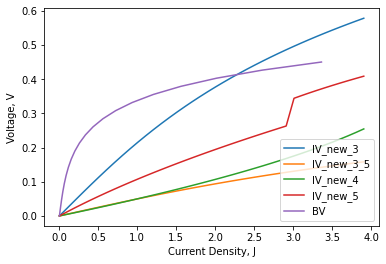

In [176]:
fig1 = plt.figure()

plt.plot(J_BP, BV_3B, label='IV_new_3')
plt.plot(J_BP, BV_3_5B, label='IV_new_3_5')
plt.plot(J_BP, BV_4B, label='IV_new_4')
plt.plot(J_BP, BV_5B, label='IV_new_5')
#plt.plot(J_BP, y_BP, label='actual')
plt.plot(J, Vact, label= 'BV')
plt.legend(loc='lower right')
plt.xlabel("Current Density, J")
plt.ylabel("Voltage, V")


Scratch 